# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Andi Liem Mark Abigael Sagala]
- **Email:** [andisagala125@gmail.com]
- **ID Dicoding:** [Andi Liem Mark Abigael Sagala]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara berdasarkan pada distrik-distrik di Beijing selama beberapa tahun?
- Distrik manakah yang memiliki kualitas udara berdasarkan jenis polusi paling baik dan paling buruk sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.patches as mpatches

## Data Wrangling

### Gathering Data

Pertama-tama kita mengunduh data set yang diperlukan

In [140]:
 # path menuju file
path = "PRSA_Data_20130301-20170228/"
# mendapat list path dari file dataset 
csv_files = glob.glob(path + '*.csv')
# membuat dataframe kosong
weather_df = []
checker = 0
# menambah data ke weather_df
for file in csv_files:
    df = pd.read_csv(file)
    weather_df.append(df)
# menyatukan beberapa dataframe menjadi satu dataframe
weather_df = pd.concat(weather_df, ignore_index=True)
# melihat 10 sampel dari dataframe
weather_df.sample(10)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
130912,25721,2016,2,5,16,15.0,34.0,4.0,10.0,300.0,80.0,2.4,1025.0,-18.9,0.0,WNW,5.6,Dongsi
415155,29452,2016,7,10,3,107.0,108.0,2.0,41.0,900.0,47.0,28.0,999.1,22.7,0.0,WSW,1.1,Wanshouxigong
203816,28497,2016,5,31,8,56.0,56.0,9.0,30.0,600.0,74.0,24.4,1002.5,6.6,0.0,S,2.0,Gucheng
59418,24355,2015,12,10,18,25.0,25.0,12.0,59.0,1000.0,25.0,4.5,1018.3,-10.4,0.0,NW,1.3,Changping
127813,22622,2015,9,29,13,40.0,40.0,2.0,37.0,1300.0,24.0,15.5,1025.8,13.5,0.0,ENE,1.6,Dongsi
173912,33657,2017,1,1,8,461.0,515.0,7.0,111.0,8000.0,2.0,-4.8,1022.3,-5.6,0.0,E,0.9,Guanyuan
19847,19848,2015,6,5,23,57.0,86.0,2.0,63.0,700.0,96.0,21.7,995.7,16.0,0.0,NE,2.0,Aotizhongxin
242374,31991,2016,10,23,22,28.0,49.0,2.0,24.0,500.0,21.0,7.9,1012.0,4.0,0.0,NW,1.3,Huairou
100003,29876,2016,7,27,19,33.0,33.0,2.0,8.0,500.0,195.0,30.3,992.8,16.0,0.0,N,6.9,Dingling
215990,5607,2013,10,20,14,26.0,29.0,4.0,12.0,300.0,80.0,19.6,1013.8,-1.5,0.0,SE,0.7,Huairou


### Assessing Data

In [141]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Dapat terlihat ada beberapa data yang perlu diperbaiki, seperti menghilangkan kolom No karena tidak relevan, terdapat nilai yang null pada beberapa kolom, dan mengubah kolom year month day hour ke bentuk waktu.

In [142]:
# menghitung jumlah data yang NaN
weather_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [143]:
# menghitung jumlah data yang terduplikat
print("Jumlah duplikasi: ", weather_df.duplicated().sum())

Jumlah duplikasi:  0


Karena tidak ada data yang terduplikat maka kita tidak perlu menghapus data duplikasi

In [144]:
weather_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Tidak terdapat keanehan data pada dataframe

Didapatkan hasil sebagai berikut

| Tipe data | Missing value | Duplicate data | Inaccurate value |
|:--------:|:--------:|:--------:|:--------:|
|  weather_df   |  Terdapat banyak data yang hilang pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM   |  Tidak ada data yang terduplikat   |    Tidak terdapat data yang kurang akurat      |

### Cleaning Data

- menghapus kolom No karena tidak relevan setelah penggabungan dataframe

In [145]:
weather_df=weather_df.drop(columns='No')

- Menangani Missing Value

Pertama-tama saya akan menghapus baris yang memiliki 6 atau lebih missing values

In [146]:
cek = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']  # Add more column names as needed

# Create a boolean DataFrame indicating where missing values are
missing = weather_df[cek].isna()

# Count the number of missing values in each row
missing_value = missing.sum(axis=1)

# Filter the DataFrame to retrieve rows with missing values in two or more columns
weather_df[missing_value >= 6]


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7882,2014,1,23,10,NaN,NaN,NaN,NaN,NaN,NaN,0.7,1011.9,-12.7,0.0,NE,1.9,Aotizhongxin
7939,2014,1,25,19,NaN,NaN,NaN,NaN,NaN,NaN,2.5,1025.1,-19.5,0.0,NNE,1.4,Aotizhongxin
7940,2014,1,25,20,NaN,NaN,NaN,NaN,NaN,NaN,1.9,1026.0,-20.6,0.0,NE,1.9,Aotizhongxin
7941,2014,1,25,21,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1026.7,-21.0,0.0,NE,1.8,Aotizhongxin
7942,2014,1,25,22,NaN,NaN,NaN,NaN,NaN,NaN,0.2,1027.3,-5.0,0.0,SW,3.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420696,2017,2,26,0,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1020.7,-8.6,0.0,NNE,1.0,Wanshouxigong
420709,2017,2,26,13,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
420731,2017,2,27,11,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
420732,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong


In [147]:
weather_df.drop(weather_df[missing_value >= 6].index, inplace= True)

Cek kembali apakah ada missing value lebih dari 6 pada sebuah baris

In [148]:
cek = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']  # Add more column names as needed

# Create a boolean DataFrame indicating where missing values are
missing = weather_df[cek].isna()

# Count the number of missing values in each row
missing_value = missing.sum(axis=1)

# Filter the DataFrame to retrieve rows with missing values in two or more columns
weather_df[missing_value >= 6]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


In [149]:
weather_df[weather_df["PM2.5"].isna()]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417803,2016,10,28,11,NaN,18.0,3.0000,20.0000,400.0,41.0000,11.1,1027.3,-8.7,0.0,N,2.7,Wanshouxigong
417804,2016,10,28,12,NaN,6.0,3.0000,15.0000,300.0,51.0000,12.1,1026.9,-7.4,0.0,NNW,3.1,Wanshouxigong
418071,2016,11,8,15,NaN,64.0,13.0000,30.0000,700.0,51.0000,11.3,1027.6,-6.1,0.0,SW,3.1,Wanshouxigong
418743,2016,12,6,15,NaN,143.0,25.0000,108.0000,1800.0,13.0000,6.1,1014.1,-11.1,0.0,SSE,1.4,Wanshouxigong


In [150]:
# menghitung mean dari PM2.5
meanpm25 = weather_df['PM2.5'].mean()

# Mengganti missing value dengan PM2.5
weather_df['PM2.5'].fillna(meanpm25, inplace=True)


In [151]:
# cek kembali missing values dari PM2.5
weather_df[weather_df['PM2.5'].isna()]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


Kemudian saya melakukan hal yang sama pada kolom PM10

In [152]:
# menghitung mean dari PM10
meanpm10 = weather_df['PM10'].mean()

# Mengganti missing value dengan PM2.5
weather_df['PM10'].fillna(meanpm10, inplace=True)

In [153]:
weather_df[weather_df['PM10'].isna()]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


- Menangani missing value dari kolom TEMP, PRES, DEWP, RAIN, wd, WSPM, dan station

In [154]:

cek = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM','station']  # Add more column names as needed

# Create a boolean DataFrame indicating where missing values are
missing = weather_df[cek].isna()

# Count the number of missing values in each row
missing_value = missing.sum(axis=1)

# Filter the DataFrame to retrieve rows with missing values in two or more columns
weather_df[missing_value >= 1]


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,NaN,-3.200,1020.5,-4.0,0.0,NaN,0.1,Aotizhongxin
11718,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.0,21.500,998.2,21.5,0.1,NaN,0.2,Aotizhongxin
13412,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.0,21.700,1008.0,15.8,0.0,NaN,0.0,Aotizhongxin
20853,2015,7,17,21,67.0,82.0,3.0,84.0,1400.0,86.0,23.700,1002.3,21.6,0.0,NaN,0.1,Aotizhongxin
23035,2015,10,16,19,274.0,338.0,23.0,243.0,4000.0,54.0,16.700,1012.6,12.6,0.0,NaN,0.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420018,2017,1,28,18,257.0,281.0,48.0,75.0,2800.0,8.0,0.625,1016.0,-7.9,0.0,NaN,0.5,Wanshouxigong
420038,2017,1,29,14,13.0,46.0,4.0,6.0,300.0,64.0,-1.220,1025.0,-21.6,0.0,NaN,6.5,Wanshouxigong
420264,2017,2,8,0,104.0,113.0,17.0,87.0,1900.0,2.0,-2.800,1026.3,-7.0,0.0,NaN,0.2,Wanshouxigong
420342,2017,2,11,6,10.0,15.0,7.0,56.0,800.0,17.0,-4.600,1025.0,-18.1,0.0,NaN,0.2,Wanshouxigong


Untuk mengangani missing value tersebut saya memutuskan untuk menghapus bagian tersebut

In [155]:
weather_df.drop(weather_df[missing_value >= 1].index, inplace= True)

In [156]:
weather_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,413907.000000,413907.000000,413907.000000,413907.000000,413907.000000,413907.000000,409858.000000,406769.000000,398199.000000,405645.000000,413907.000000,413907.000000,413907.000000,413907.000000,413907.000000
mean,2014.656022,6.521368,15.714653,11.500127,79.707999,104.540263,15.844510,50.594782,1228.902498,57.507136,13.561435,1010.732868,2.497666,0.064738,1.734144
std,1.176584,3.443828,8.796623,6.918805,80.424234,91.595941,21.672332,35.115235,1158.816628,56.705952,11.428754,10.464729,13.804407,0.824512,1.244706
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,6.000000,21.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.200000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,12.000000,56.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.000000,110.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Masih terdapat missing value pada kolom SO2, NO2, CO, dan O3 
untuk itu saya memutuskan untuk menggani nilai missing value dengan mean dari data tersebut

In [157]:
def change_with_mean(lk):
    mean = weather_df[lk].mean()

    # Mengganti missing value dengan PM2.5
    weather_df[lk].fillna(mean, inplace=True)

list = ['SO2', 'NO2', 'CO', 'O3']
for x in list:
    change_with_mean(x)

In [158]:
weather_df.isna()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
420764,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
420765,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
420766,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis (EDA)

### Explore ...

Saya akan menambahkan kolom datetime pada data frame dengan menggunakan data dari kolom tahun, bulan, hari, dan jam.

In [159]:
weather_df['datetime'] = pd.to_datetime(weather_df[['year', 'month', 'day', 'hour']])



Sekarang saya ingin melihat informasi mengenai arah udara di tiap distrik untuk melihat arah angin pada setiap distrik
Cara berikut hanya merupakan contoh, karena untuk menghitung sebuah indeks kualitas udara diperlukan perhitungan yang lebih detail

In [160]:
def pm25(pm25):
    return (pm25 / 25)

def pm10(pm10):
    return (pm10 / 50)

def co(co):
    return (co / 9)

def no2(no2):
    return (no2 * 0.08)

def o3(o3):
    return (o3 * 0.065)

def so2(so2):
    return (so2 * 0.08)

weather_df['Overall_AQI'] = weather_df.apply(lambda row: max(pm25(row['PM2.5']),pm10(row['PM10']),co(row['CO']),no2(row['NO2']),o3(row['O3']),so2(row['SO2'])), axis=1)


Kemudian saya ingin melihat informasi mengenai kondisi udara berdasarkan indeks kualitas udara

In [161]:
weather_df["Air quality"] = weather_df.Overall_AQI.apply(lambda x: "Good" if x <= 50 else "moderate" if 50 < x <=100 else "Unhealty for sensitive groups" if 100<x<=150 else "Unhealthy" if 150<x<=200 else "Very unhealthy" if 200<x<=300 else "Hazardous")

Saya ingin melihat informasi mengenai jumlah data untuk setiap kondisi udara

In [162]:
weather_df.groupby(by="Air quality").agg({
    # "product_id": "nunique",
    "Overall_AQI": "count"
    # "price":  ["min", "max"]
})

,Overall_AQI
Air quality,
Good,87463
Hazardous,35092
Unhealthy,43959
Unhealty for sensitive groups,80691
Very unhealthy,38888
moderate,127814


Kemudian saya ingin melihat arah udara yang dominan pada masing-masing distrik

In [163]:
pd.pivot_table(weather_df, index='wd', columns='station', aggfunc='size', fill_value=0)


station,Aotizhongxin,Changping,Dingling,Dongsi,Guanyuan,Gucheng,Huairou,Nongzhanguan,Shunyi,Tiantan,Wanliu,Wanshouxigong
wd,,,,,,,,,,,,
E,2566,2384,2387,3509,2592,1593,2127,3535,1141,3511,1257,2787
ENE,3870,1294,1287,3817,3926,1862,1991,3822,1408,3814,3628,3055
ESE,1700,2757,2739,2657,1702,1347,1988,2683,1366,2671,570,1751
N,2017,3737,3721,1853,2057,3923,1349,1854,3842,1845,3207,1166
NE,5022,1709,1700,3511,5097,3092,2197,3505,3307,3502,6668,3538
NNE,2395,1905,1896,1910,2423,2587,1660,1913,4496,1906,3313,1550
NNW,1533,4727,4716,1678,1574,1609,1646,1673,1638,1666,1389,1178
NW,1822,3795,3771,2443,1848,2729,4871,2439,2419,2411,1101,2525
S,1293,1678,1671,1515,1293,2310,1305,1533,2575,1522,963,1486


Blok ini ditujukan untuk membuat data selanjutnya untuk dashboard

In [164]:

weather_df.to_csv("data.csv",index = False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren kualitas udara berdasarkan pada distrik-distrik di Beijing selama beberapa tahun?

Saya membuat plot dari kualitas udara rata-rata pada setiap bulan

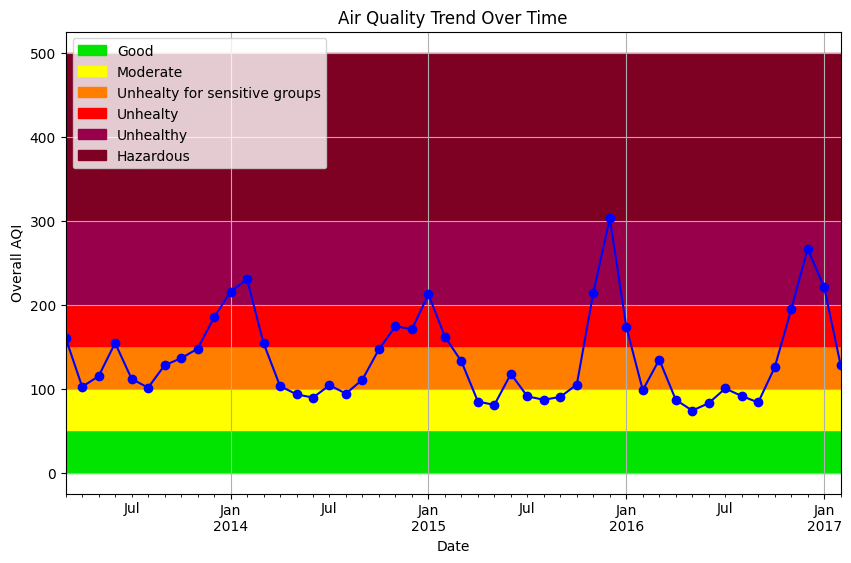

In [165]:
if checker == 0:
    weather_df.set_index('datetime', inplace=True)
    checker = checker + 1;
monthlygraph = weather_df['Overall_AQI'].resample('M').mean()
plt.figure(figsize=(10, 6))
monthlygraph.plot(color='blue', linestyle='-', marker='o')
plt.axhspan(0, 50, color='#00e400', alpha=1)
plt.axhspan(51, 100, color='#ffff00', alpha=1)
plt.axhspan(101, 150, color='#ff7e00', alpha=1)
plt.axhspan(151, 200, color='#ff0000', alpha=1)
plt.axhspan(201,300, color='#99004c', alpha=1)
plt.axhspan(301, 500, color='#7e0023', alpha=1)

good = mpatches.Patch(color='#00e400', label='Good')
moderate = mpatches.Patch(color='#ffff00', label='Moderate')
uns = mpatches.Patch(color='#ff7e00', label='Unhealty for sensitive groups')
unhealthy = mpatches.Patch(color='#ff0000', label='Unhealty')
veu= mpatches.Patch(color='#99004c', label='Unhealthy')
haz=mpatches.Patch(color='#7e0023', label='Hazardous')
plt.legend(handles=[good,moderate,uns,unhealthy,veu,haz], loc='upper left')

plt.title('Air Quality Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Overall AQI')
plt.grid(True)
plt.show()

### Pertanyaan 2:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3424\1517796554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Overall_AQI", y="station", data=sum_order_items_df.head(6), palette=colors, ax=ax[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3424\1517796554.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Overall_AQI", y="station", data=sum_order_items_df.sort_values(by="Overall_AQI", ascending=True).head(6), palette=colors, ax=ax[1])


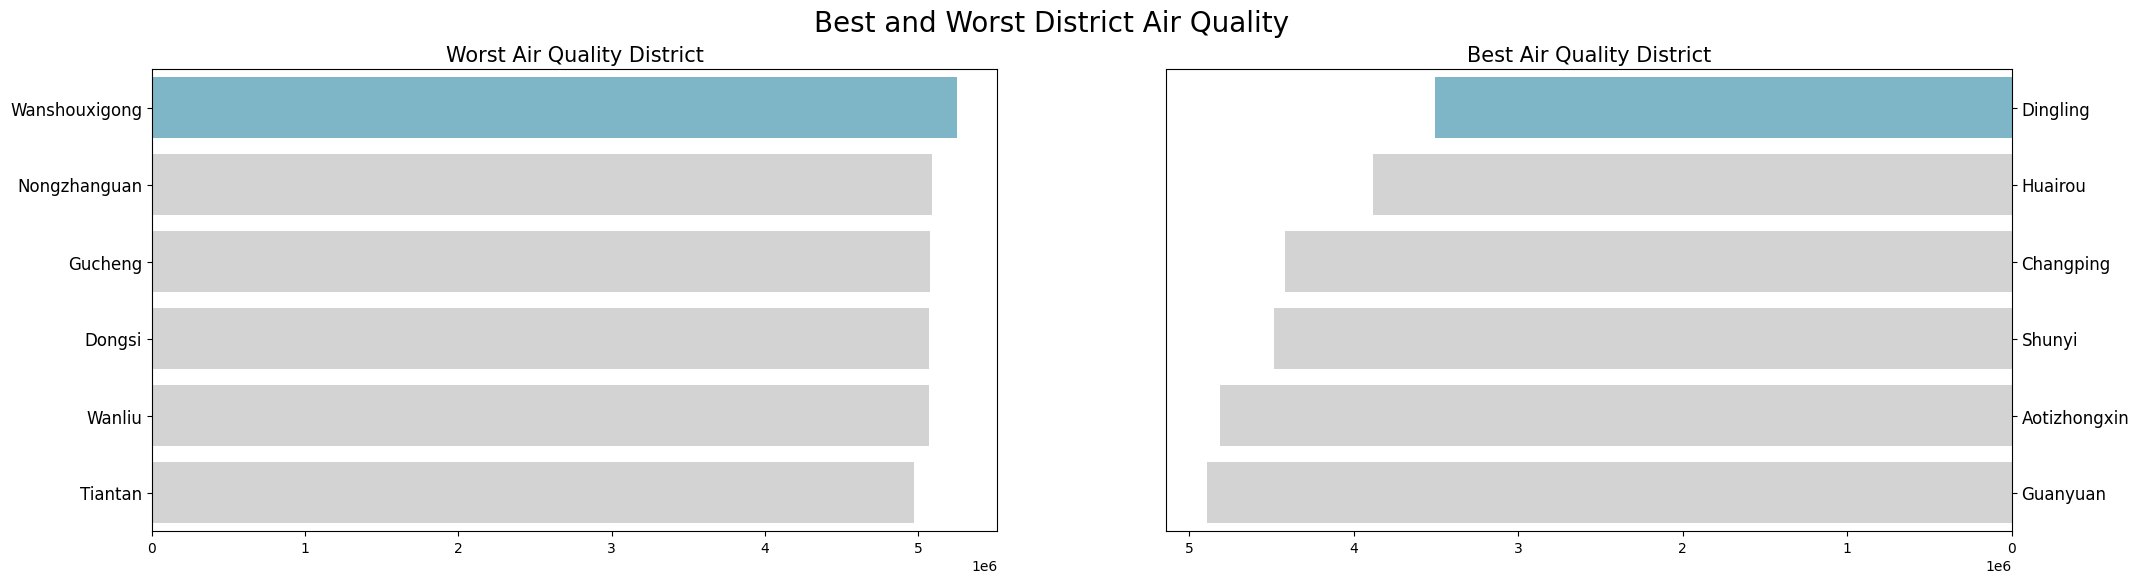

In [166]:
sum_order_items_df = weather_df.groupby("station").Overall_AQI.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="Overall_AQI", y="station", data=sum_order_items_df.head(6), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Worst Air Quality District", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="Overall_AQI", y="station", data=sum_order_items_df.sort_values(by="Overall_AQI", ascending=True).head(6), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Best Air Quality District", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst District Air Quality", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Kualitas udara sering berada pada bagian moderate dan unhealthy dengan puncaknya pada Desember 2015, dapat dilihat dari plot bahwa tren kualitas udara cenderung fluktuaktif 
- Conclution pertanyaan 2 : Distrik Wanshouxigong memiliki kualitas udara paling buruk selama sepanjang tahun dan distrik Dingling memiliki kualitas udara paling baik